In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [19]:
def policy(q_vals, temp):
    return np.exp(q_vals*temp)/np.sum(np.exp(q_vals*temp))

def q_values(M):
    return np.array([M[0, 0]/np.sum(M[0, :]), M[1, 0]/np.sum(M[1, :])])

def gain(Q_before, Q_after):
    probs_before = policy(Q_before, 1)
    probs_after  = policy(Q_after, 1)

    return np.dot(probs_after - probs_before, Q_after)

In [3]:
M = np.array(
    [
        [1, 1],
        [5, 5]
    ]
)
M_before = M.copy()

(0.0, 1.0)

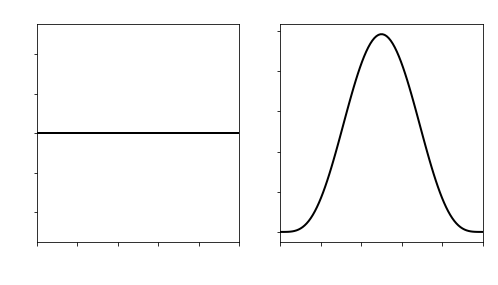

In [4]:
fig = plt.figure(figsize=(8, 4))

x = np.linspace(0, 1, 100)

plt.subplot(1, 2, 1)
rv = beta(M[0, 0], M[0, 1])
plt.plot(x, rv.pdf(x), 'k-', lw=2)
plt.title('Value: %.3f'%np.dot(q_values(M_before), policy(q_values(M_before), 1)), c='w', fontsize=16)
plt.xlabel('p', c='w', fontsize=16)
plt.xticks(c='w')
plt.yticks(c='w')
plt.xlim(0, 1)

plt.subplot(1, 2, 2)
rv = beta(M[1, 0], M[1, 1])
plt.plot(x, rv.pdf(x), 'k-', lw=2)
plt.xlabel('p', c='w', fontsize=16)
plt.xticks(c='w')
plt.yticks(c='w')
plt.xlim(0, 1)

In [5]:
def plot_belief(a, b):
    rv = beta(a, b)
    x  = np.linspace(0, 1, 100)
    plt.plot(x, rv.pdf(x), 'k-', lw=2)
    plt.xlabel('p', c='w', fontsize=16)
    plt.xticks(c='w')
    plt.yticks(c='w')
    plt.xlim(0, 1)
    # plt.ylim(0,3)
    plt.axvline(0.5)
    return None

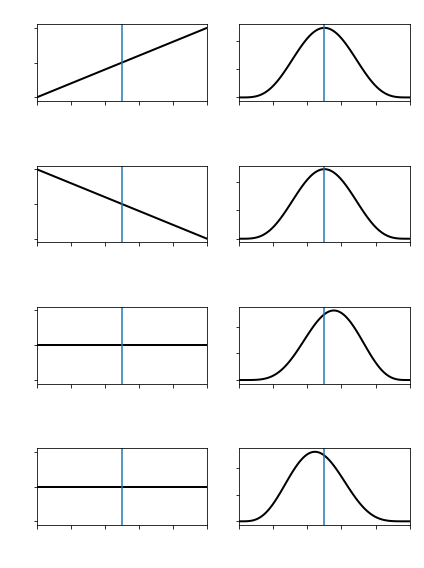

In [6]:
fig = plt.figure(figsize=(6, 8))

plt.subplot(4, 2, 1)
M_after = M_before.copy()
M_after[0, 0] += 1
plot_belief(M_after[0, 0], M_after[0, 1])
plt.title('Value: %.3f'%np.dot(q_values(M_after), policy(q_values(M_after), 1)), c='w', fontsize=16)
plt.subplot(4, 2, 2)
plot_belief(M_after[1, 0], M_after[1, 1])

plt.subplot(4, 2, 3)
M_after = M_before.copy()
M_after[0, 1] += 1
plt.title('Value: %.3f'%np.dot(q_values(M_after), policy(q_values(M_after), 1)), c='w', fontsize=16)
plot_belief(M_after[0, 0], M_after[0, 1])
plt.subplot(4, 2, 4)
plot_belief(M_after[1, 0], M_after[1, 1])

plt.subplot(4, 2, 5)
M_after = M_before.copy()
M_after[1, 0] += 1
plt.title('Value: %.3f'%np.dot(q_values(M_after), policy(q_values(M_after), 1)), c='w', fontsize=16)
plot_belief(M_after[0, 0], M_after[0, 1])
plt.subplot(4, 2, 6)
plot_belief(M_after[1, 0], M_after[1, 1])

plt.subplot(4, 2, 7)
M_after = M_before.copy()
M_after[1, 1] += 1
plt.title('Value: %.3f'%np.dot(q_values(M_after), policy(q_values(M_after), 1)), c='w', fontsize=16)
plot_belief(M_after[0, 0], M_after[0, 1])
plt.subplot(4, 2, 8)
plot_belief(M_after[1, 0], M_after[1, 1])

plt.tight_layout()